# Axial Drilling Map

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
import pygmt
import numpy as np

## Plot vent locations

In [4]:
vents = pd.read_excel('../data/markers-vents-axial-master-updated-post2017.xlsx', sheet_name = 1,
                     usecols=[0, 1, 2, 7, 10], names=['name', 'lat', 'lon', 'type', 'use'])
vents.use = vents.use.str.casefold()
vents_plot = vents[vents.use == 'yes'].reset_index(drop = True)
vents_plot.head()

,name,lat,lon,type,use
0,Mkr166,45.933164,-129.982282,diffuse,yes
1,Old Tubeworms,45.933313,-129.982069,diffuse,yes
2,Village,45.926180,-129.980570,diffuse,yes
3,Bag-1,45.916332,-129.989045,snowblower,yes
4,Bag-2,45.917412,-129.988765,snowblower,yes


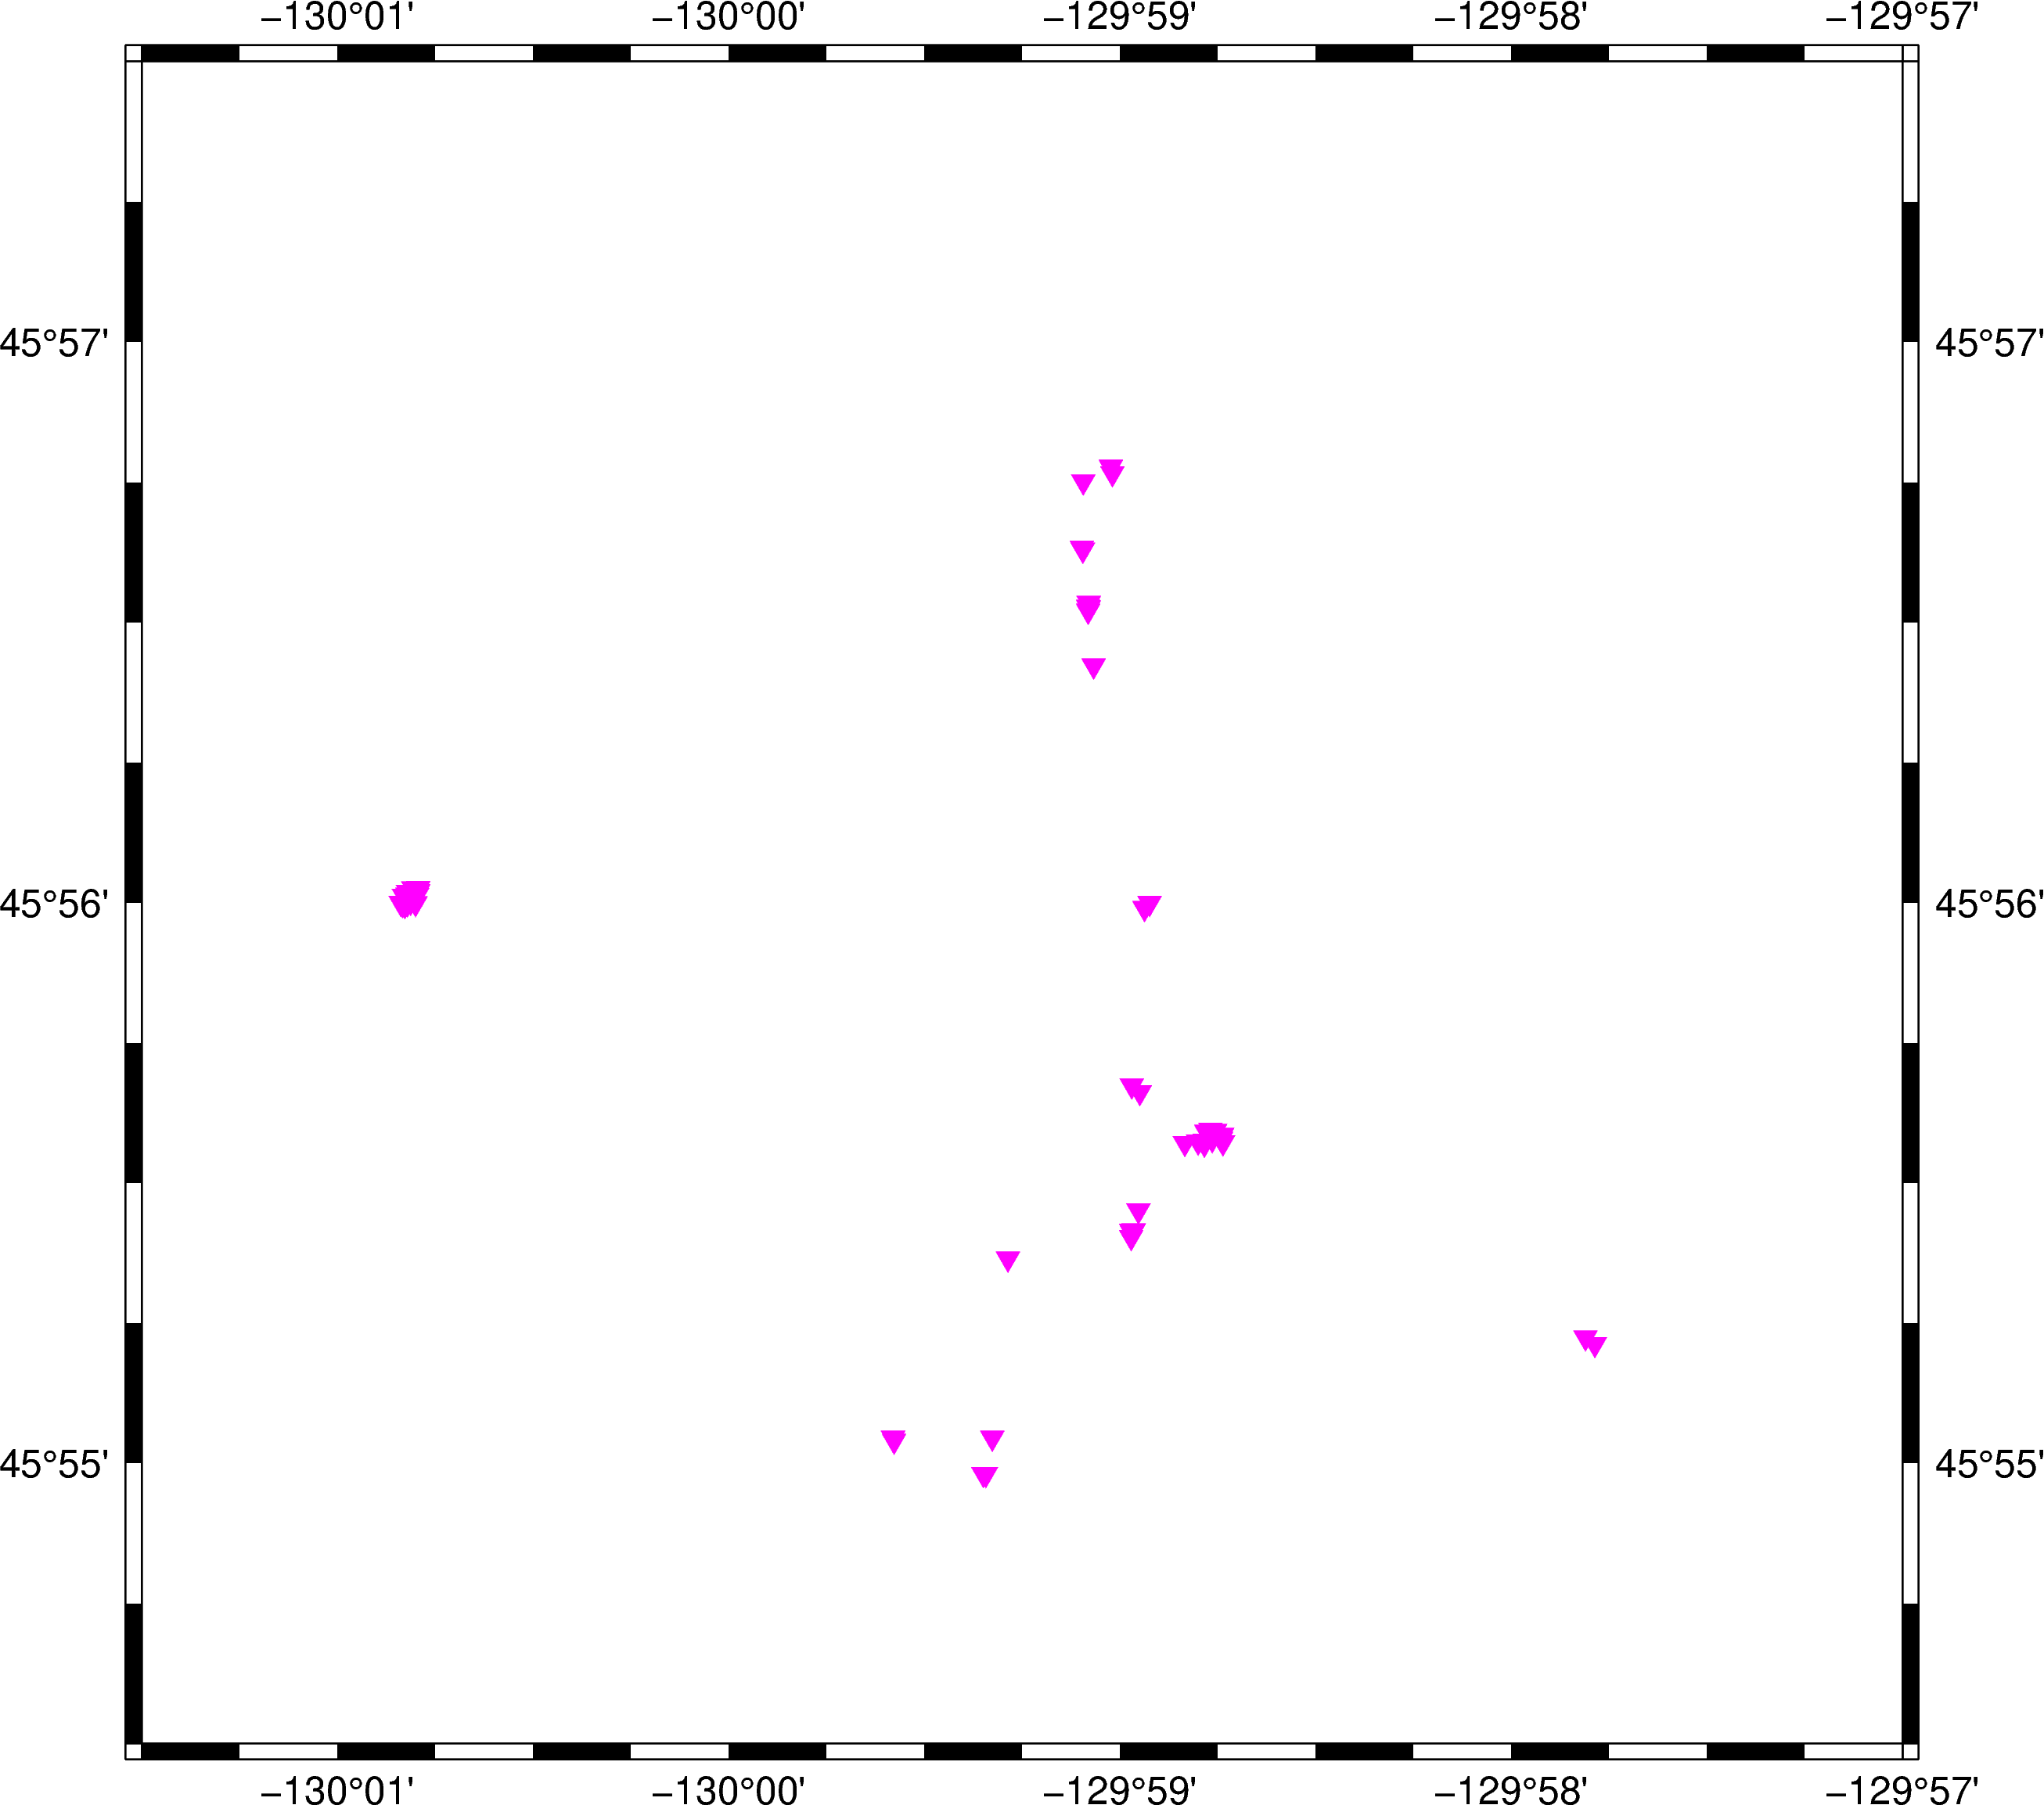

In [5]:
fig = pygmt.Figure()
fig.basemap(region=[-130-1.5/60, -129-57/60, 45+54.5/60, 45+57.5/60], projection="M-130/46/7.5i", frame=True)
#fig.basemap(region=[-130.5, -129, 45, 47], projection="M-130/46/7.5i", frame=True)
fig.plot(vents_plot.lon.values, vents_plot.lat.values, style="i0.3c", color="magenta")
fig.show()

## Plot OOI Cable Infrastructure

In [6]:
ooi_objects = pd.read_excel('../data/RSN_Positions_20190906_PUB.xlsx', sheet_name = 2,
                     usecols=[0, 1, 2, 8], names=['name', 'lat', 'lon', 'type'])

ooi_objects.head()

,name,lat,lon,type
0,AOABPA301,45.954846,-130.009253,instrument
1,AXVMW2-P2,45.816952,-129.753748,cable plug
2,BMH Pacific City,45.202300,-123.967150,cable conduit
3,BOTPTA301,45.954850,-130.008772,instrument
4,BOTPTA302,45.939859,-129.974170,instrument


In [7]:
fig.plot(ooi_objects.lon.values, ooi_objects.lat.values, style="c0.2", color="black")

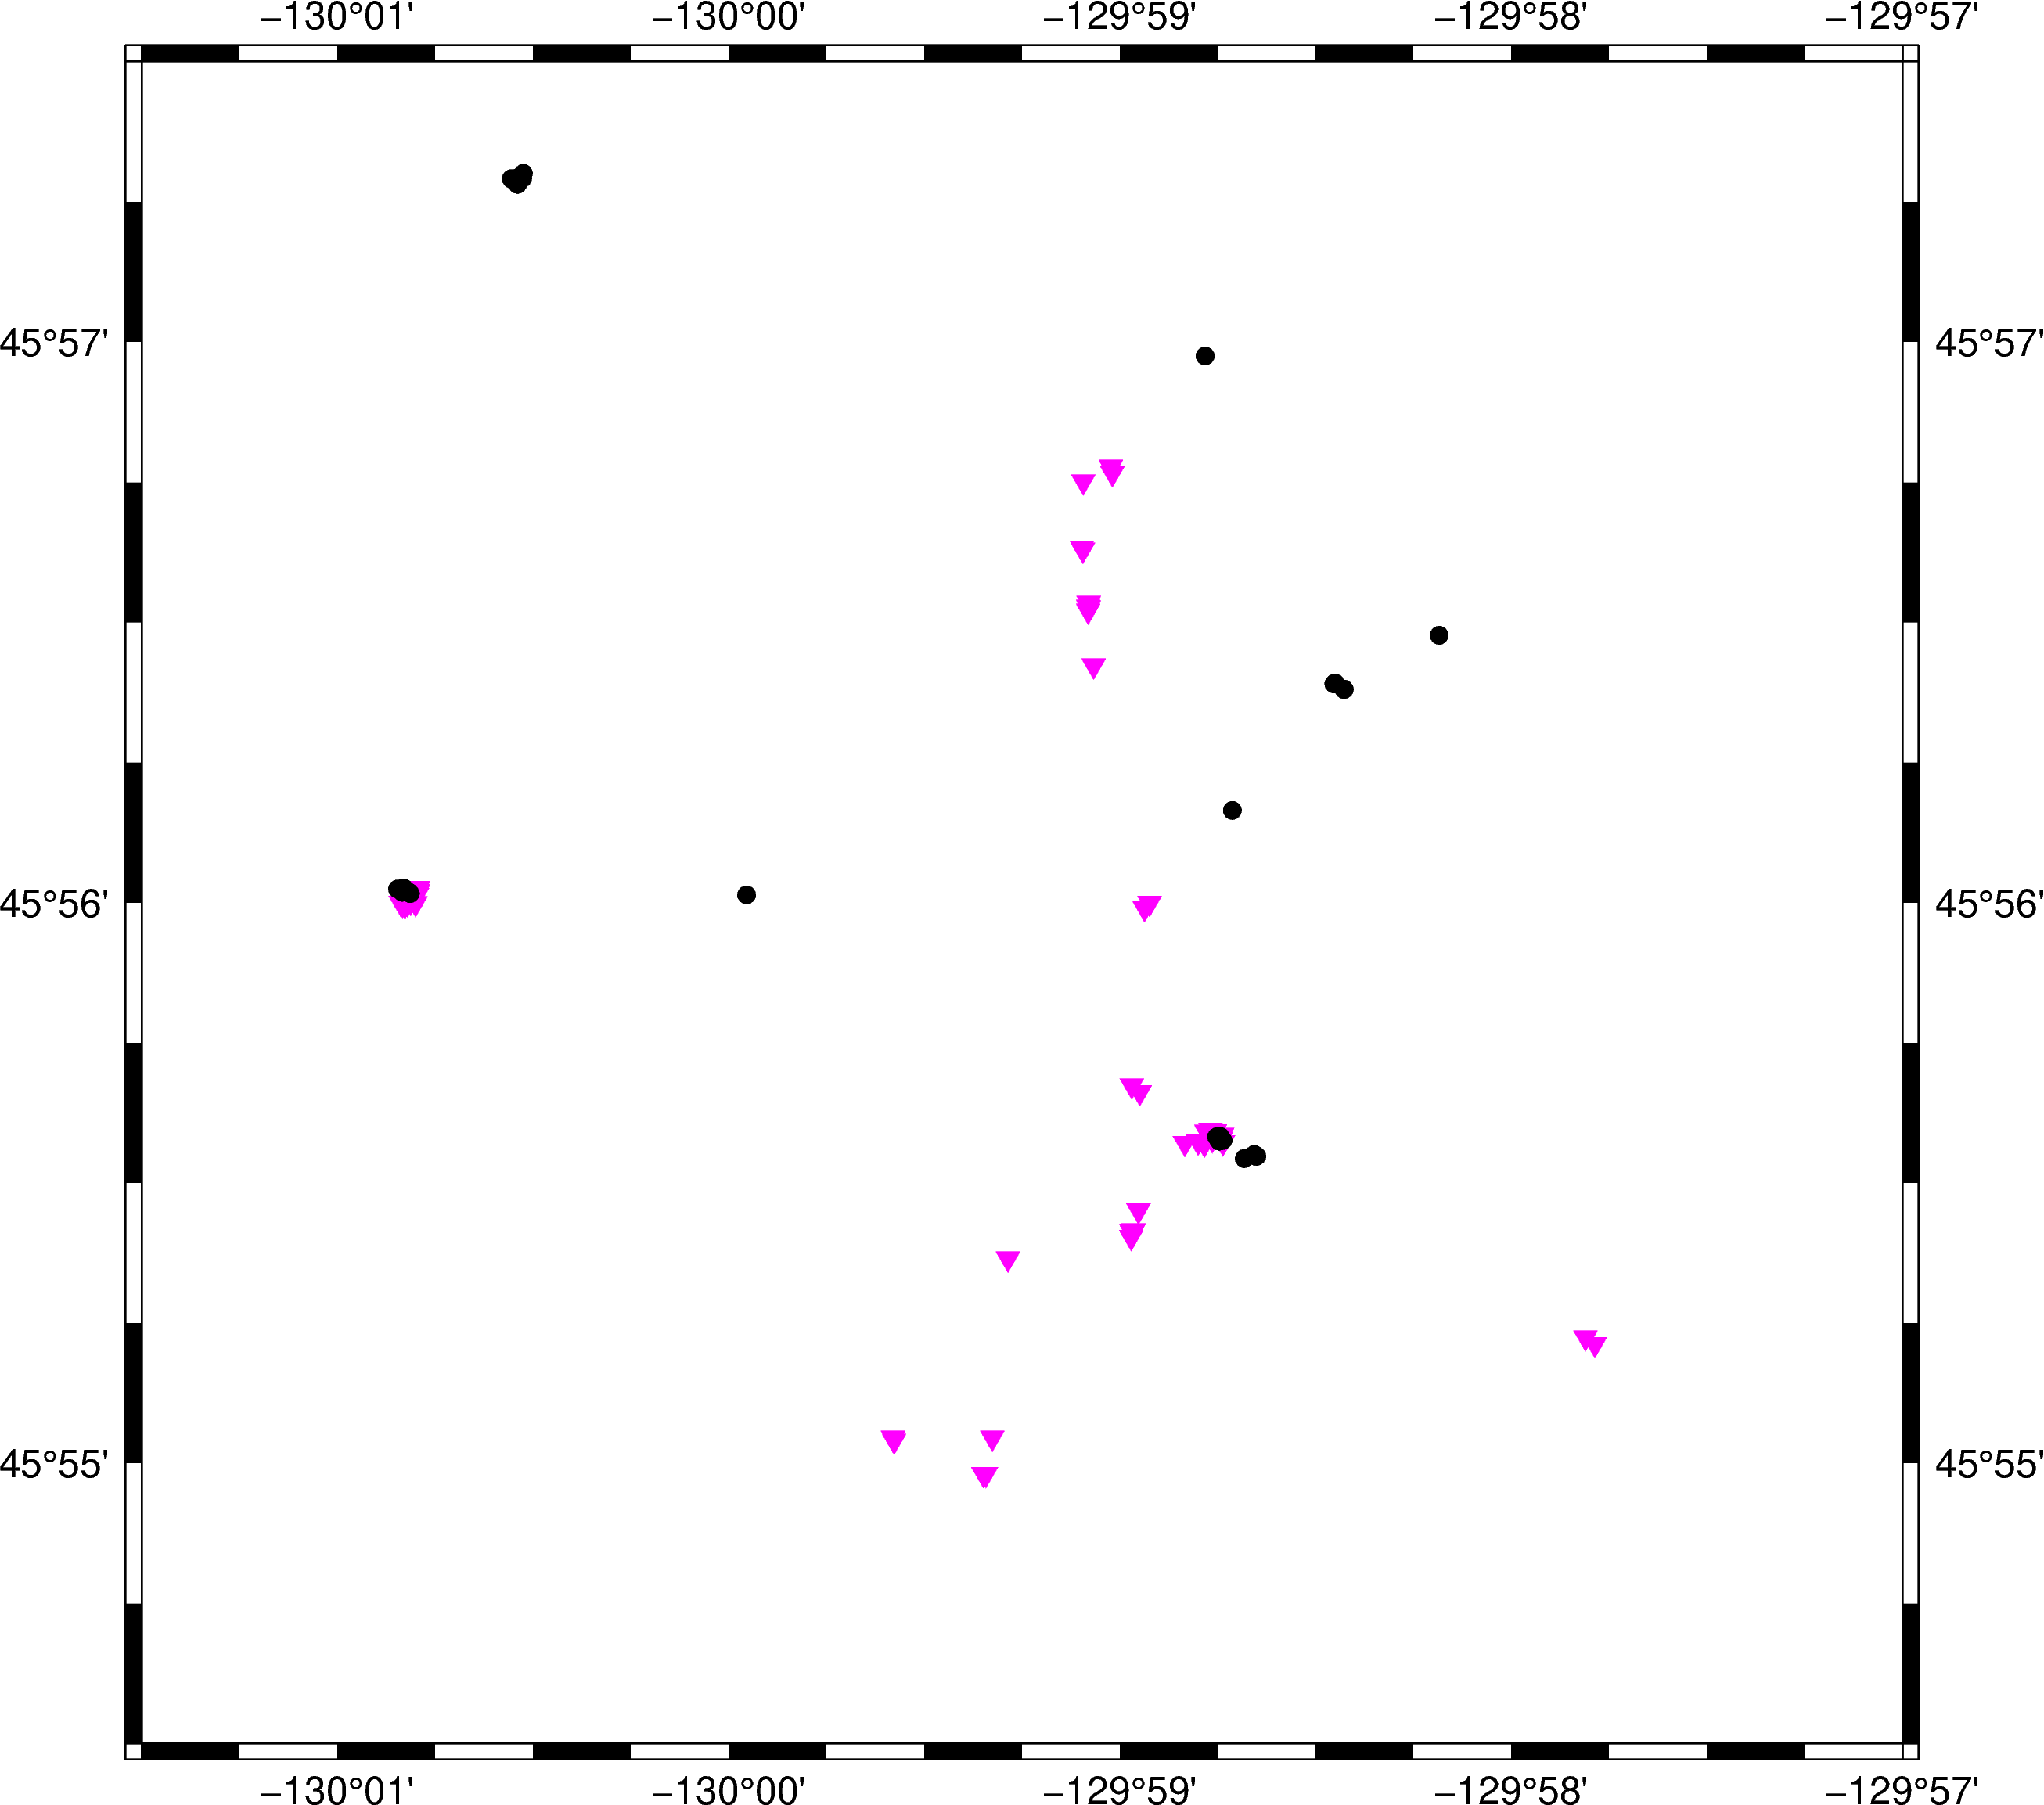

In [8]:
fig.show()

In [10]:
ooi_cables = pd.read_excel('../data/RSN_Positions_20190906_PUB.xlsx', sheet_name = 5,
                     usecols=[1, 2, 3], names=['name', 'lat', 'lon'])
ooi_cables.head()

,name,lat,lon
0,RS01W1,45.202300,-123.967150
1,RS01W1,45.199757,-123.978350
2,RS01W1,45.198083,-123.985483
3,RS01W1,45.197908,-123.986117
4,RS01W1,45.197020,-123.989340


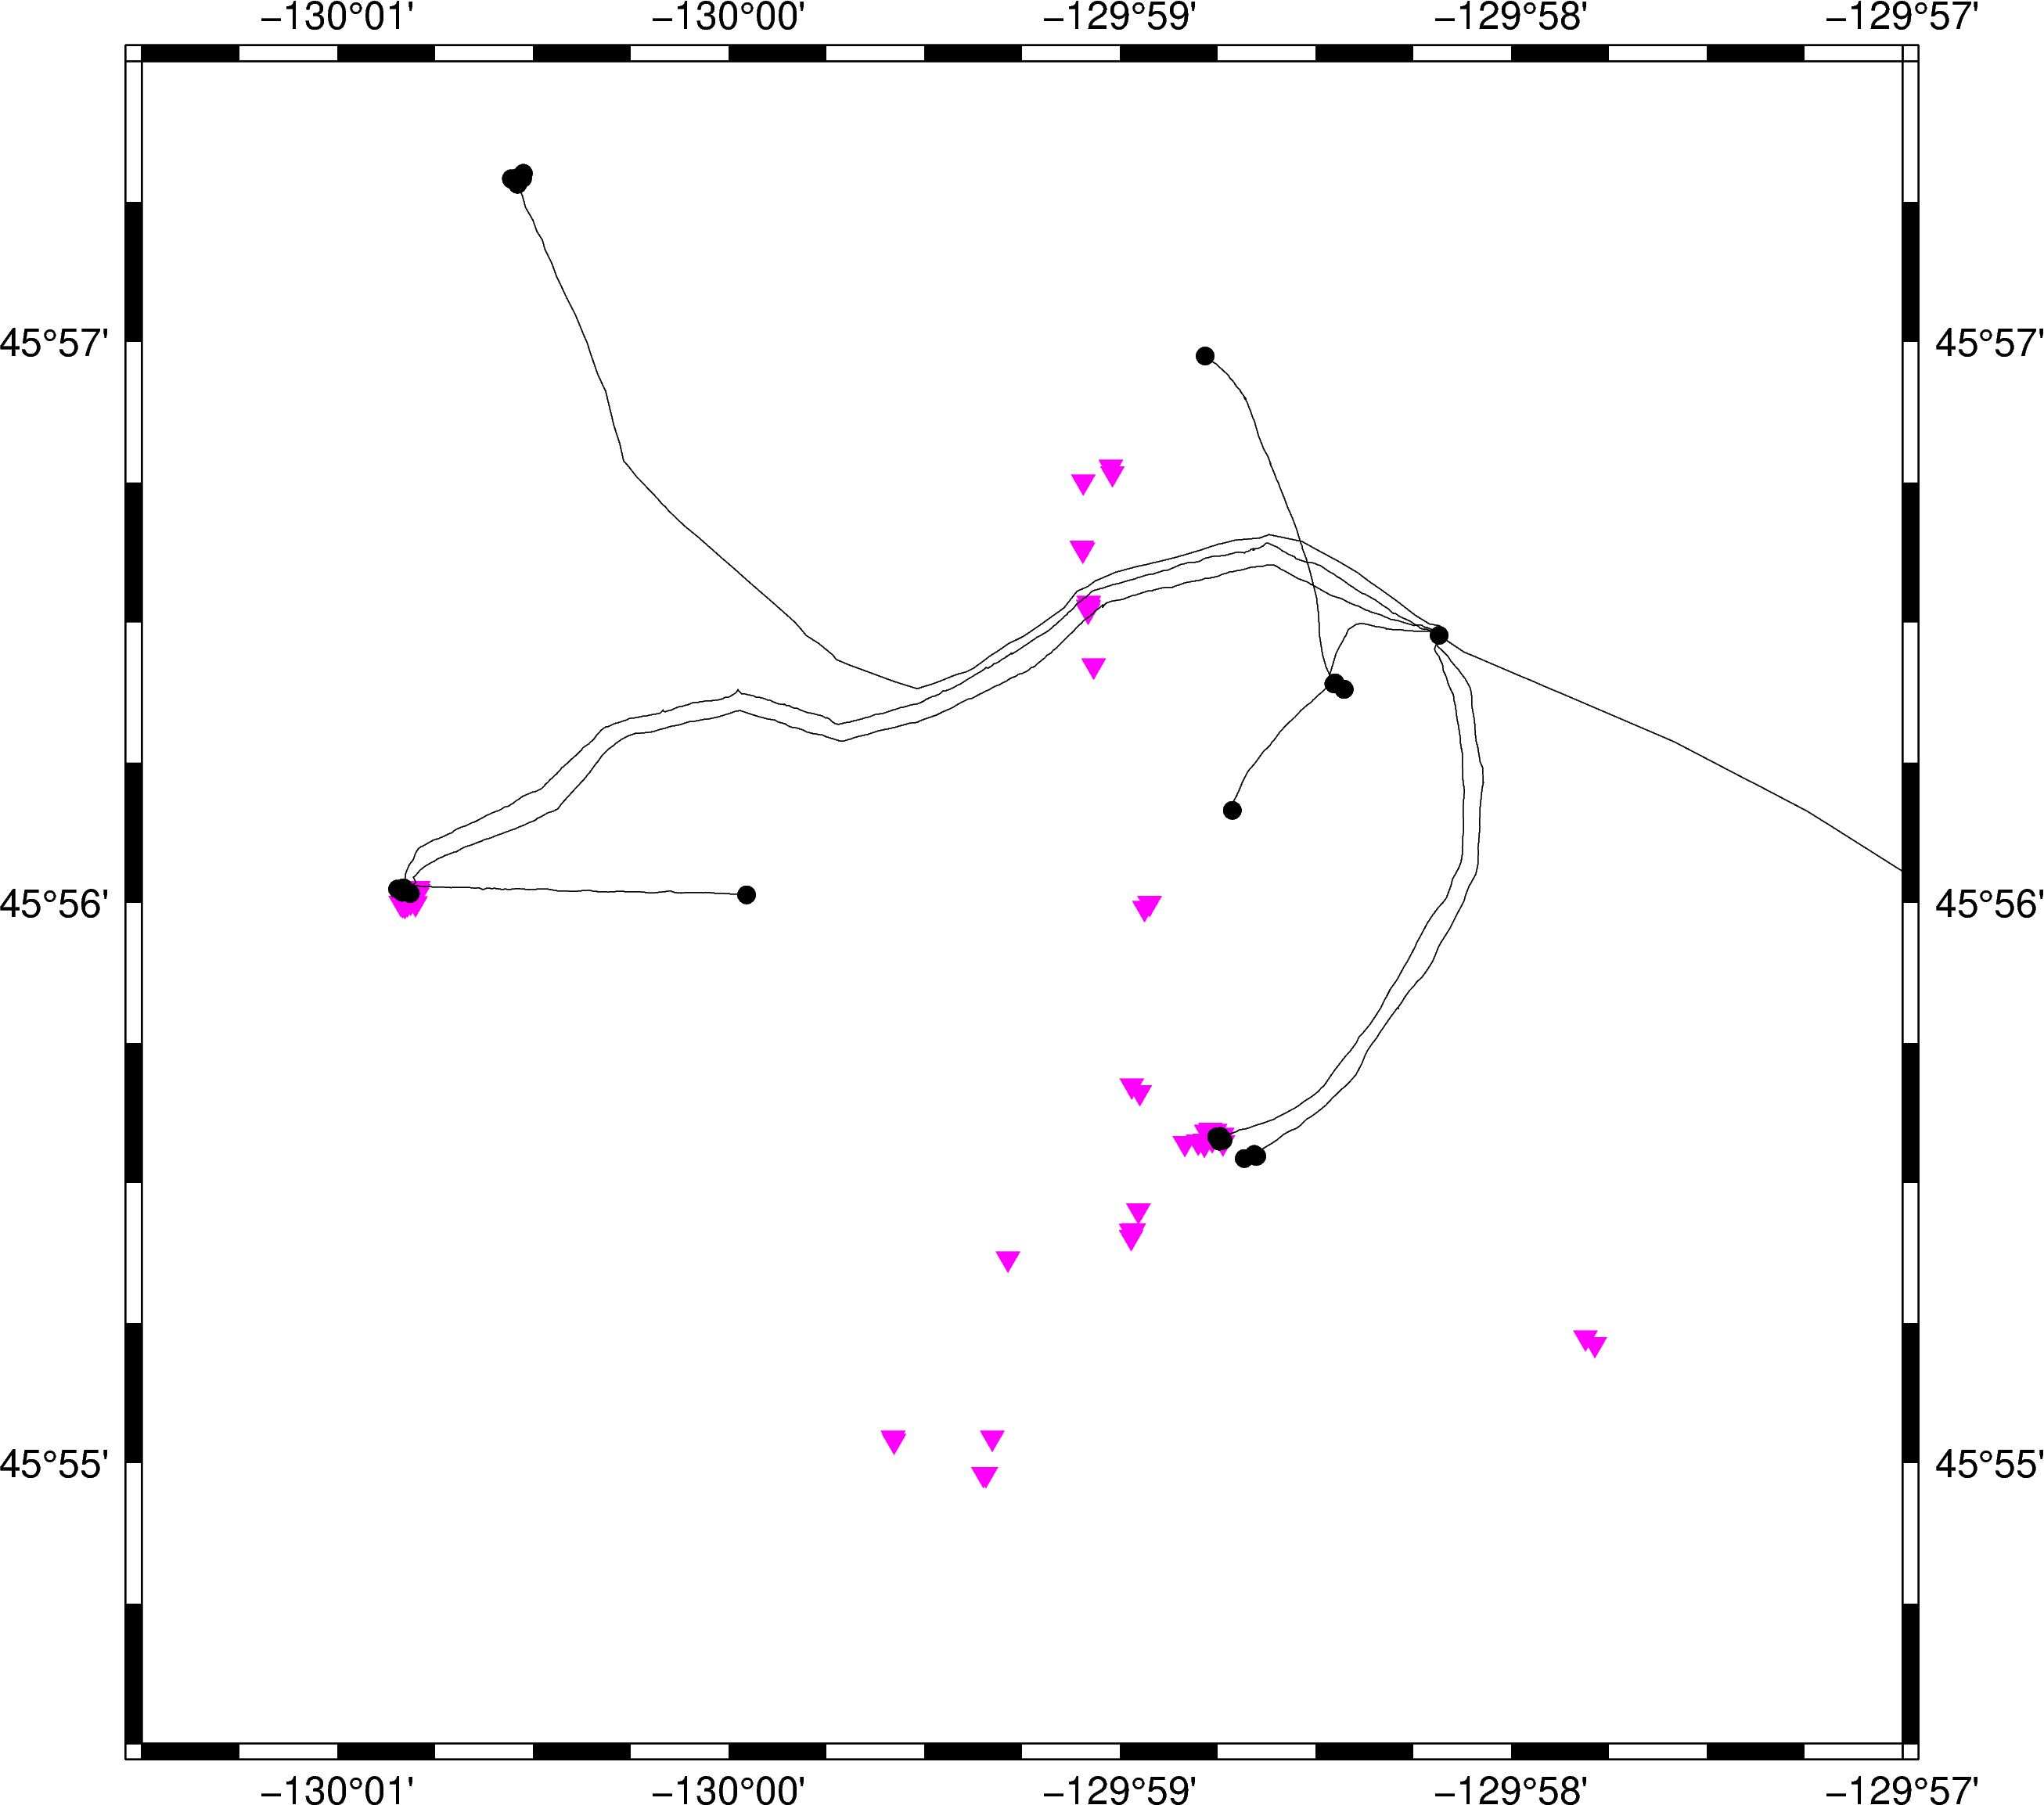

In [11]:
for cable in ooi_cables.name.unique():
    cable_locs = ooi_cables.loc[ooi_cables.name == cable]
    fig.plot(cable_locs.lon.values, cable_locs.lat.values)
fig.show()